# Example usage of SeisSrcMoment to calculate $M_W$ in the frequency domain

This example is for a volcano-tectonic earthquake at Uturuncu, Bolivia. The moment magnitude, $M_W$, is calculated in the frequency domain, i.e. the long period spectral level is calculated by fitting a Brune model, as detailed in Stork et al (2014). This earthquake's moment tensor is analysed in Alvizuri and Tape (2016), with $M_W$ = 2.80 found by full waveform moment tensor inversion.

## 1. Specify parameters to use:

In [6]:
import numpy as np
from SeisSrcMoment import moment
from NonLinLocPy import read_nonlinloc

In [1]:
# Specify variables:
inventory_fname = "data/instrument_gain_data/IRISDMC-Plutons_dataless.dataless"  # The inventory fname, pointing to the dataless file for the network (for full instrument frequency response removal)
mseed_filename = "data/mseed_data/20100516063454720000.m" # Note: One can pass the script an obspy stream instead if one wishes.
NLLoc_event_hyp_filename = "data/NLLoc_data/loc.Tom_RunNLLoc000.20100516.063457.grid0.loc.hyp"
stations_not_to_process = []
window_before_after = [0.1, 0.6] # The time before and after the phase pick to use for calculating the magnitude within
filt_freqs = [0.5, 49.0] # Filter frequencies to apply (important if not removing long period spectral noise)
MT_six_tensor = [] # If this is not specified, assumes average DC component in P (or S) from Stork et al (2014).
density = 2750. #2000. # Density of medium, in kg/m3
Vp = 5000. # P-wave velocity in m/s
# Note that Q not required as the program calculates Q when fitting the source model.
use_full_spectral_method = True
verbosity_level = 0 # Verbosity level (1 for moment only) (2 for major parameters) (3 for plotting of traces)
plot_switch = True
remove_noise_spectrum = False # If True, removes noise using spectrum taken from window before trace. Not thoroughly tested yet, but can get around by applying a high pass filter above anyway.


In [8]:
# Read in stations to calculate for directly from nonlinloc hyp file:
nonlinloc_event_hyp_data = read_nonlinloc.read_hyp_file(NLLoc_event_hyp_filename)
stations_to_calculate_moment_for = list(nonlinloc_event_hyp_data.phase_data.keys())

## Run moment calculation:

 Using average radiation pattern value instead.


/Users/eart0504/opt/anaconda3/lib/python3.7/site-packages/obspy/io/xseed/fields.py:377: UserWarning: Date is required.
  warnings.warn('Date is required.', UserWarning)
/Users/eart0504/opt/anaconda3/lib/python3.7/site-packages/obspy/signal/detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


Station (PLLO) or channel (HHN) not in instrument inventory, therefore not correcting for this component and removing it.
Station (PLLO) or channel (HHE) not in instrument inventory, therefore not correcting for this component and removing it.
Station (PLLO) or channel (HHZ) not in instrument inventory, therefore not correcting for this component and removing it.
Sigma_0: 7.081226631247064e-08 f_c: 10.055787013239904 t_star: 0.03557862597744755


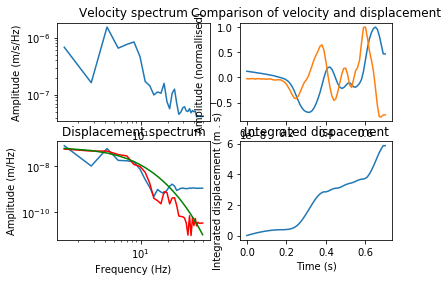

Sigma_0: 8.965846391157487e-08 f_c: 6.532205479084794 t_star: 0.03525616473498924


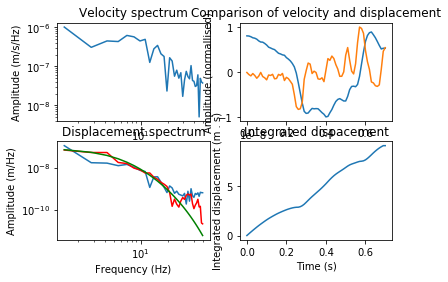

Sigma_0: 9.875372519344738e-08 f_c: 9.517629242631145 t_star: 0.030846363104357177


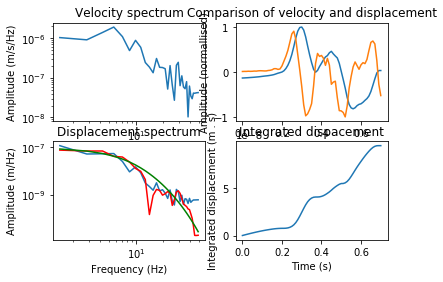

Sigma_0: 7.810585924953551e-08 f_c: 7.108672819864915 t_star: 0.03777633162509596


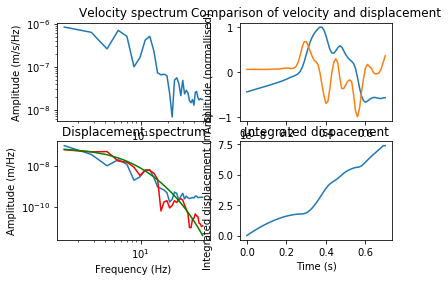

Sigma_0: 1.976462835659904e-08 f_c: 6.432798077441835 t_star: 0.01776713900937713


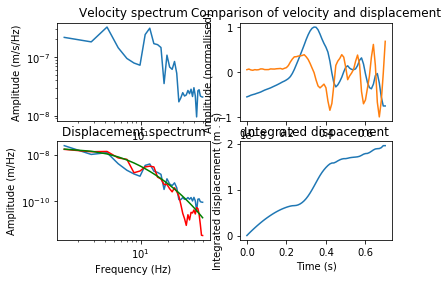

Sigma_0: 1.1012044324853064e-07 f_c: -7.998193523331016 t_star: 0.043440263611975824


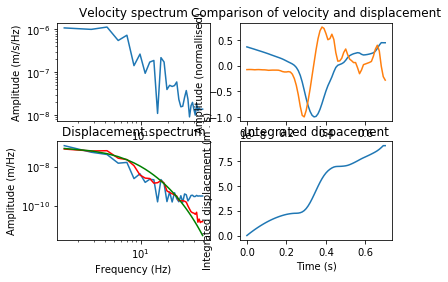

Seismic moment release (Nm): 16061623033951.943


In [10]:
# Find seismic moment release:
av_M_0, std_err_av_M_0, n_obs, event_obs_dict = moment.calc_moment(mseed_filename, NLLoc_event_hyp_filename, stations_to_calculate_moment_for, density, Vp, inventory_fname=inventory_fname, window_before_after=window_before_after, filt_freqs=filt_freqs, use_full_spectral_method=use_full_spectral_method, stations_not_to_process=stations_not_to_process, MT_six_tensor=MT_six_tensor, verbosity_level=verbosity_level, plot_switch=plot_switch)
print("Seismic moment release (Nm):", av_M_0)

In [11]:
# And find corresponding moment magnitude, M_w (Hanks and Kanamori 1979):
M_w = (2./3.)*np.log10(av_M_0) - 6.0
print("Local moment magnitude, M:", M_w)

Local moment magnitude, M: 2.803859619203539


Note that this magnitude is approximately the same as that found in Alvizuri and Tape (2016), where they found that $M_W = 2.80$.

### References:

Alvizuri, C., & Tape, C. (2016). Full moment tensors for small events (Mw < 3) at Uturuncu volcano, Bolivia. Geophysical Journal International, 206(3), 1761–1783. https://doi.org/10.1093/gji/ggw247

Stork, A. L., Verdon, J. P., & Kendall, J. M. (2014). The robustness of seismic moment and magnitudes estimated using spectral analysis. Geophysical Prospecting, 62(4), 862–878. https://doi.org/10.1111/1365-2478.12134